In [1]:
#!pip install geopy
#!pip install python-google-places
%matplotlib inline
import pandas as pd
from datetime import datetime
from geopy.distance import geodesic
import geopy.distance
from geopy.distance import vincenty as VIN
from geopy.distance import great_circle
from googleplaces import GooglePlaces, types, lang
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pylab as plot
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn import preprocessing
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.formula.api as sm



data = pd.read_csv(r"C:\Users\Khaled\Google Drive\Self Development\University of Toronto Data Science Certificate\3250 Foundations of Data Science\Term Project\unique_mls_db_GIT.csv")
cpi=pd.read_csv(r"C:\Users\Khaled\Google Drive\Self Development\University of Toronto Data Science Certificate\3250 Foundations of Data Science\Term Project\CPI.csv")

#coordinates of major go train stations in mississauga and nearby cities: Lisgar, Meadowvale, Streesville, _
#Erindale, Cocksville, Dixie, Kipling, Clarkson, Port Credit, and Long Branch

go_station_msga=[[43.5905809,-79.788362],[43.5976,-79.75369999999998],
                 [43.5762,-79.70910000000003],[43.5670973,-79.6689102],
                 [43.5819,-79.62369999999998],[43.607605,-79.5776749],
                 [43.6357039,-79.5372283],[43.51251816552179,-79.63435649871826],
                 [43.5555,-79.5874],[43.59133291164543,-79.54609036445617]]

#coordinates of major hospitals in mississauga

hospitals_msga = [[43.5713, -79.6084],[43.5594, -79.7033],[43.4507, -79.7639],[43.4962539,-79.8716229]]


In [2]:
data.head()

,mlsno,stno,stname,city,area,soldprice,solddate,type,style,bdrm,wshrm,latitude,longitude,house_condo,aptno,address
0,E3853125,46,Hinsley,Ajax,Northeast Ajax,595000,6/30/2017,Semi-Detached,2-Storey,3,3,43.891599,-79.028612,house,NaN,"46 Hinsley Cres, Ajax"
1,E3833751,508,Norfolk,Pickering,Amberlea,677000,6/30/2017,Detached,2-Storey,3,3,43.827530,-79.123617,house,NaN,"508 Norfolk Sq, Pickering"
2,N3788507,36,Innisvale,Markham,Cornell,725000,6/30/2017,Semi-Detached,2-Storey,4,3,43.900148,-79.238976,house,NaN,"36 Innisvale Dr, Markham"
3,E3855735,14,Shudell,Toronto E01,Blake-Jones,755000,6/30/2017,Semi-Detached,2-Storey,2,2,43.675379,-79.337634,house,NaN,"14 Shudell Ave, Toronto"
4,W3854388,2500,Hargood,Mississauga,Streetsville,1050000,6/30/2017,Detached,2-Storey,4,3,43.576264,-79.729552,house,NaN,"2500 Hargood Pl, Mississauga"


In [3]:
data.describe()

,soldprice,bdrm,wshrm,latitude,longitude
count,1.955240e+05,195524.000000,195524.000000,195524.000000,195524.000000
mean,7.656679e+05,2.830855,2.653142,43.727473,-79.468918
std,5.719666e+05,1.097000,1.238492,0.136501,0.233164
min,0.000000e+00,0.000000,0.000000,43.288120,-80.127424
25%,4.390000e+05,2.000000,2.000000,43.642452,-79.650354
50%,6.310000e+05,3.000000,2.000000,43.721190,-79.446030
75%,8.880000e+05,4.000000,3.000000,43.822972,-79.345323
max,2.588889e+07,9.000000,35.000000,44.155510,-78.687984


In [4]:
data_msga = data.loc[data['city']=='Mississauga']
data_msga.head()

,mlsno,stno,stname,city,area,soldprice,solddate,type,style,bdrm,wshrm,latitude,longitude,house_condo,aptno,address
4,W3854388,2500,Hargood,Mississauga,Streetsville,1050000,6/30/2017,Detached,2-Storey,4,3,43.576264,-79.729552,house,NaN,"2500 Hargood Pl, Mississauga"
38,W3817888,551,Cavell,Mississauga,Cooksville,668000,6/29/2017,Semi-Detached,Bungalow-Raised,3,2,43.563612,-79.622475,house,NaN,"551 Cavell Dr, Mississauga"
39,W3850685,3582,Birchmeadow,Mississauga,Applewood,670000,6/29/2017,Semi-Detached,Bungalow-Raised,3,2,43.612874,-79.607933,house,NaN,"3582 Birchmeadow Cres, Mississauga"
40,W3848786,4186,Uxbridge,Mississauga,Rathwood,804500,6/29/2017,Detached,2-Storey,3,3,43.616948,-79.613434,house,NaN,"4186 Uxbridge Lane, Mississauga"
42,W3835920,4597,Centretown,Mississauga,Hurontario,889500,6/29/2017,Semi-Detached,2-Storey,4,4,43.595464,-79.664838,house,NaN,"4597 Centretown Way, Mississauga"


In [5]:
def classifyHouseFees():
    
    global data_msga
    house_fees = {'house':1, 'condo':2}
    data_msga['house_fees'] = data_msga['house_condo'].map(house_fees)

In [6]:
def mapHouseArea():
    
    global data_msga
    house_area = {'Streetsville':1, 'Cooksville':2,'Applewood':3,'Rathwood':4,'Hurontario':5,'Central Erin Mills':6,'Mineola':7,'Clarkson':8,
                 'City Centre':9,'Meadowvale':10,'Malton':11,'Erin Mills':12,'Churchill Meadows':13,'Lisgar':14,'Port Credit':15,'East Credit':16,
                 'Creditview':17,'Meadowvale Village':18,'Lorne Park':19,'Fairview':20,'Mississauga Valleys':21,
                 'Erindale':22,'Sheridan':23,'Dixie':24,'Northeast':25,'Mavis-Erindale':26,'Gateway':27,
                 'Meadowvale Business Park':28,'Sheridan Park':29,'Southdown':30,'Port Credi':31,'City Centr':32,
                  'Lakeview':33,'Huttonville':34}    
    
    data_msga['house_area'] = data_msga['area'].map(house_area)

In [7]:
def adjustSoldPrice():
    
    global data_msga
    #add soldyear, soldmonth columns
    data_msga.loc[:,['solddate']] = pd.to_datetime(data_msga['solddate'])
    data_msga.insert(len(data_msga.columns),column='soldyear',value=pd.DatetimeIndex(data_msga['solddate']).year)
    data_msga.insert(len(data_msga.columns),column='soldmonth',value=pd.DatetimeIndex(data_msga['solddate']).month)

    #merge with CPI file and convert nominal sold prices to real sold prices with base case = 2015-07-31 

    cpi_targetrange=cpi[(pd.to_datetime(cpi['Date'])>=datetime(2015,7,1)) & (pd.to_datetime(cpi['Date'])<=datetime(2017,6,30))]
    cpi_targetrange.insert(len(cpi_targetrange.columns),column='soldyear',
                           value=pd.DatetimeIndex(cpi_targetrange['Date']).year)
    cpi_targetrange.insert(len(cpi_targetrange.columns),column='soldmonth',
                           value=pd.DatetimeIndex(cpi_targetrange['Date']).month)
    data_msga=pd.merge(cpi_targetrange, data_msga, on=['soldyear','soldmonth'], how='outer')
    cpibase=float(cpi_targetrange['PX_LAST'][pd.to_datetime(cpi_targetrange['Date'])==datetime(2015,7,31)])
    data_msga.insert(len(data_msga.columns),column='cpibase',value=cpibase)
    data_msga.insert(len(data_msga.columns),column='adjustedSoldPrice',value=
                    round(data_msga['soldprice']*data_msga['cpibase']/data_msga['PX_LAST'],0))

In [8]:
#take a house's coordinates and calculate minimum distance of a house to GO stations 
def closestGoHospital():
    global data_msga
    
    data_msga_coordinate = data_msga[['latitude','longitude']].values
    mindist_GO = []
    mindist_Hospital = []
    for i in range(len(data_msga_coordinate)):
        tempGO = []
        tempHospital = []
        for j in range(len(go_station_msga)):
            tempGO.append(geodesic(go_station_msga[j], data_msga_coordinate[i]).meters)
        mindist_GO.append(round(min(tempGO), 2))

        for j in range(len(hospitals_msga)):
            tempHospital.append(geodesic(hospitals_msga[j], data_msga_coordinate[i]).meters)
        mindist_Hospital.append(round(min(tempHospital),2))
        
    #add the minimum distance to the dataframe

    data_msga.insert(len(data_msga.columns),column='mindist_GO',value=mindist_GO)
    data_msga.insert(len(data_msga.columns),column='mindist_Hospital',value=mindist_Hospital)

In [9]:
def classifySeasons():
    
    global data_msga
    data_msga['season'] = 0
    #summer season is from June to August
    data_msga.loc[(data_msga.soldmonth<=8 ) & (data_msga.soldmonth >=6),'season']= 1
    
    #shoulder season from Aprint to May and September to November
    data_msga.loc[(data_msga.soldmonth<=11 ) & (data_msga.soldmonth >=9) & (data_msga.soldmonth >=4) & (data_msga.soldmonth <=5),'season']= 2
    
    #winter season from December to March
    data_msga.loc[(data_msga.soldmonth==12 ) | (data_msga.soldmonth >=1) & (data_msga.soldmonth <=3),'season']= 3

In [10]:
def preProcessingFunction():
    global data_msga
    data_msga['normalizedMinDistGO'] = preprocessing.scale(data_msga.loc[:,['mindist_GO']])
    data_msga['normalizedMinDistHospital'] = preprocessing.scale(data_msga.loc[:,['mindist_Hospital']])

In [11]:
def houseType():
    
    #Categorize house types: 1 = town house, 2 = detached, 3 = semi-detached, 4 = condo; 
    #Drop the remaining house types including vacant land, link house, mobile trailer etc. 
    global data_msga
    house_types = {'Att/Row/Twnhouse':1, 'Condo Townhouse':1,'Det W/Com Elements':2,'Detached':2,'Semi-Det Condo':3,
               'Semi-Detached':3,'Comm Element Condo':4,'Condo Ap':4,'Condo Apartment':4,'Condo Apt':4,
               'Condo To':4,'Det Condo':4,'Leasehold Condo':4,}

    data_msga['house_type'] = data_msga['type'].map(house_types)
    data_msga=data_msga.dropna(subset=['house_type'])


In [12]:
classifyHouseFees()
mapHouseArea()    
adjustSoldPrice()
closestGoHospital()
classifySeasons()
houseType()
#preProcessingFunction()

C:\Users\Khaled\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Khaled\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Khaled\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [13]:
#clean unwanted coloumns
data_msga.drop(['latitude','longitude','Date','area','soldyear','house_condo','soldmonth','city','stno','stname','PX_LAST','style','cpibase','aptno','mlsno','type','address','solddate','soldprice'], axis=1,inplace = True)

In [14]:
data_msga

,bdrm,wshrm,house_fees,house_area,adjustedSoldPrice,mindist_GO,mindist_Hospital,season,house_type
0,4,3,1,1,1025038.0,1652.02,2829.88,1,2.0
1,3,2,1,2,652120.0,2034.26,1422.18,1,3.0
2,3,2,1,3,654072.0,2511.87,4619.24,1,3.0
3,3,3,1,4,785375.0,3067.71,5087.96,1,2.0
4,4,4,1,5,868354.0,3168.72,5070.10,1,3.0
5,4,4,1,5,883485.0,4212.47,5828.68,1,2.0
6,4,3,1,6,1034801.0,677.66,1925.86,1,2.0
7,4,4,1,5,1029919.0,4364.62,6018.51,1,2.0
8,2,2,1,7,1054325.0,1844.45,2615.11,1,2.0
9,4,4,1,6,1425291.0,1677.39,1001.50,1,2.0


In [15]:
#Check if any value in the dataframe is Null
data_msga.isnull().values.any()

False

C:\Users\Khaled\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Khaled\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


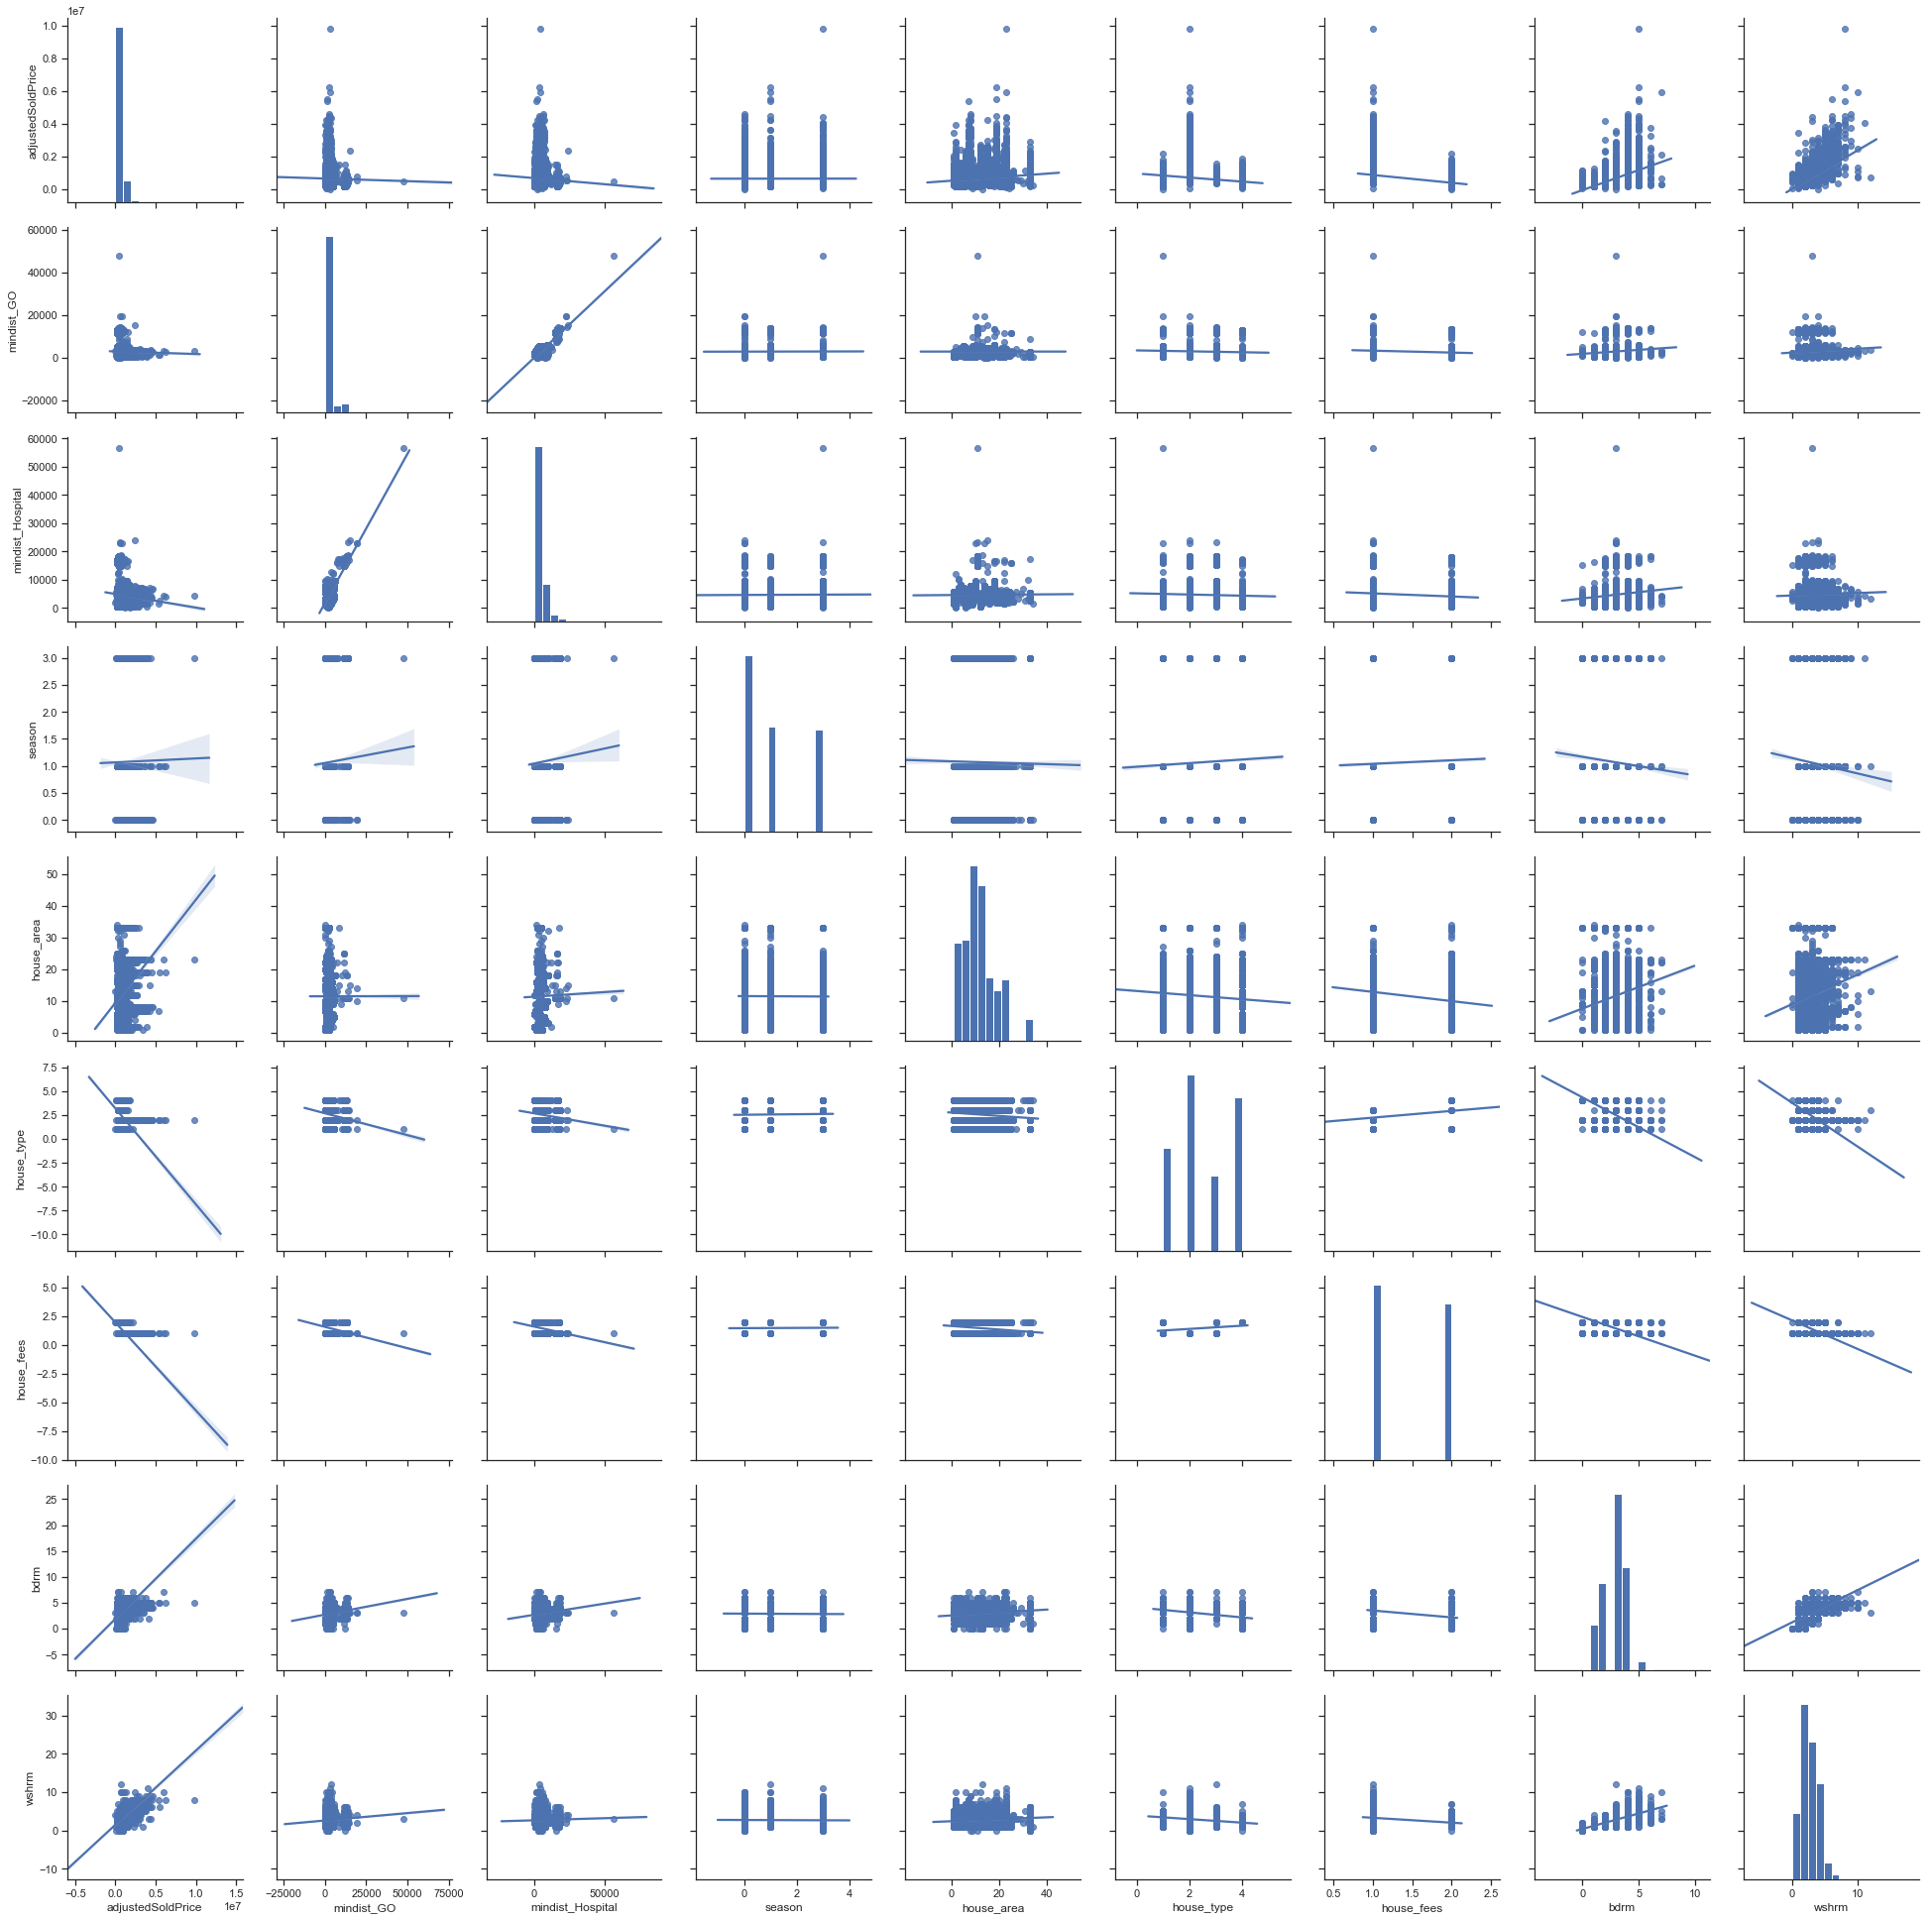

In [19]:
col = ['adjustedSoldPrice', 'mindist_GO', 'mindist_Hospital', 'season', 'house_area', 'house_type', 'house_fees', 'bdrm','wshrm']
sns.set(style='ticks')
sns.pairplot(data_msga[col], size=3, kind='reg')

In [48]:
def linearRegressionModel():
    X = data_msga[['mindist_GO','mindist_Hospital','season','house_area','house_type','house_fees','bdrm','wshrm']]

    y = data_msga['adjustedSoldPrice']


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    #Create an instance of a LinearRegression() model named lm.
    lm = LinearRegression(fit_intercept=True)

    #Train/fit lm on the training data.
    lm.fit(X_train,y_train)

    #print intercept
    print("The intercept of the model  ")
    print(lm.intercept_)

    
    #Print out the coefficients of the model
    print("The coefficients of the model  ")
    print(lm.coef_)

    #print R^2 
    print("R Squared of the model is  ")
    print(lm.score(X_test,y_test))

    #evaluating performance by predicting off the test values
    predictions = lm.predict(X_test)

    #scatterplot of the real test values versus the predicted values
    plt.scatter(y_test,predictions)
    plt.xlabel('Y Test')
    plt.ylabel('Predicted Y')
    plt.show()


    #evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2)
    print('MAPE :'," ", metrics.mean_absolute_error(y_test,predictions))

    # explore the residuals to make sure everything was okay with our data.
    #Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().

    sns.distplot(y_test - predictions,bins=50)

The intercept of the model  
525926.2412450013
The coefficients of the model  
[-6.28012853e+00 -1.41932112e+01  6.85294159e+03  1.85831711e+03
 -3.43681815e+03 -2.43791812e+05  5.01081933e+04  1.43429805e+05]
R Squared of the model is  
0.5637543822467366


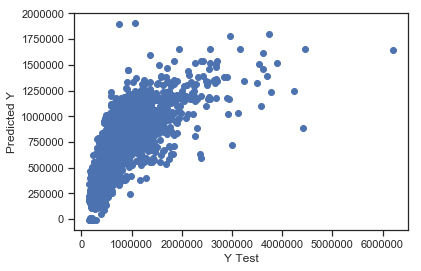

MAPE :   160413.4177695257


C:\Users\Khaled\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


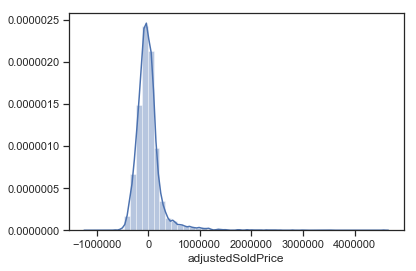

In [49]:
linearRegressionModel()

In [53]:
y = data_msga['adjustedSoldPrice']
data_msga_final = data_msga[['mindist_GO','mindist_Hospital','season','house_type','house_fees','house_area','wshrm','bdrm']]
x=data_msga_final.values 
result = sm.OLS(y,x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      adjustedSoldPrice   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                 1.906e+04
Date:                Fri, 12 Apr 2019   Prob (F-statistic):               0.00
Time:                        00:45:03   Log-Likelihood:            -3.0924e+05
No. Observations:               22232   AIC:                         6.185e+05
Df Residuals:                   22224   BIC:                         6.186e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -5.7360      1.261     -4.550      0.000      -8.207      -3.265
x2           -10.6801      0.961    -11.118      0.000     -12.563      -8.797
x3          1.193e+04   1444.821      8.257      0.000    9098.207    1.48e+04
x4          3.074e+04   1586.534     19.377      0.000    2.76e+04    3.39e+04
x5         -1.258e+05   3045.096    -41.317      0.000   -1.32e+05    -1.2e+05
x6          3583.3467    263.110     13.619      0.000    3067.633    4099.061
x7          1.624e+05   2252.747     72.069      0.000    1.58e+05    1.67e+05
x8          1.084e+05   2456.465     44.138      0.000    1.04e+05    1.13e+05
==============================================================================
Omnibus:                    21899.608   Durbin-Watson:                   1.726
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3687754.324
Skew:                           4.404   Prob(JB):                         0.00
Kurtosis:                      65.478   Cond. No.                     1.22e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""